In [2]:
import numpy as np                          #importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reg = pd.read_csv("C:/Users/choub/OneDrive/Desktop/Real estate.csv")       #importing the file using pandas
reg

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
reg.shape

(414, 8)

In [5]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
reg.describe()                       #describing the data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


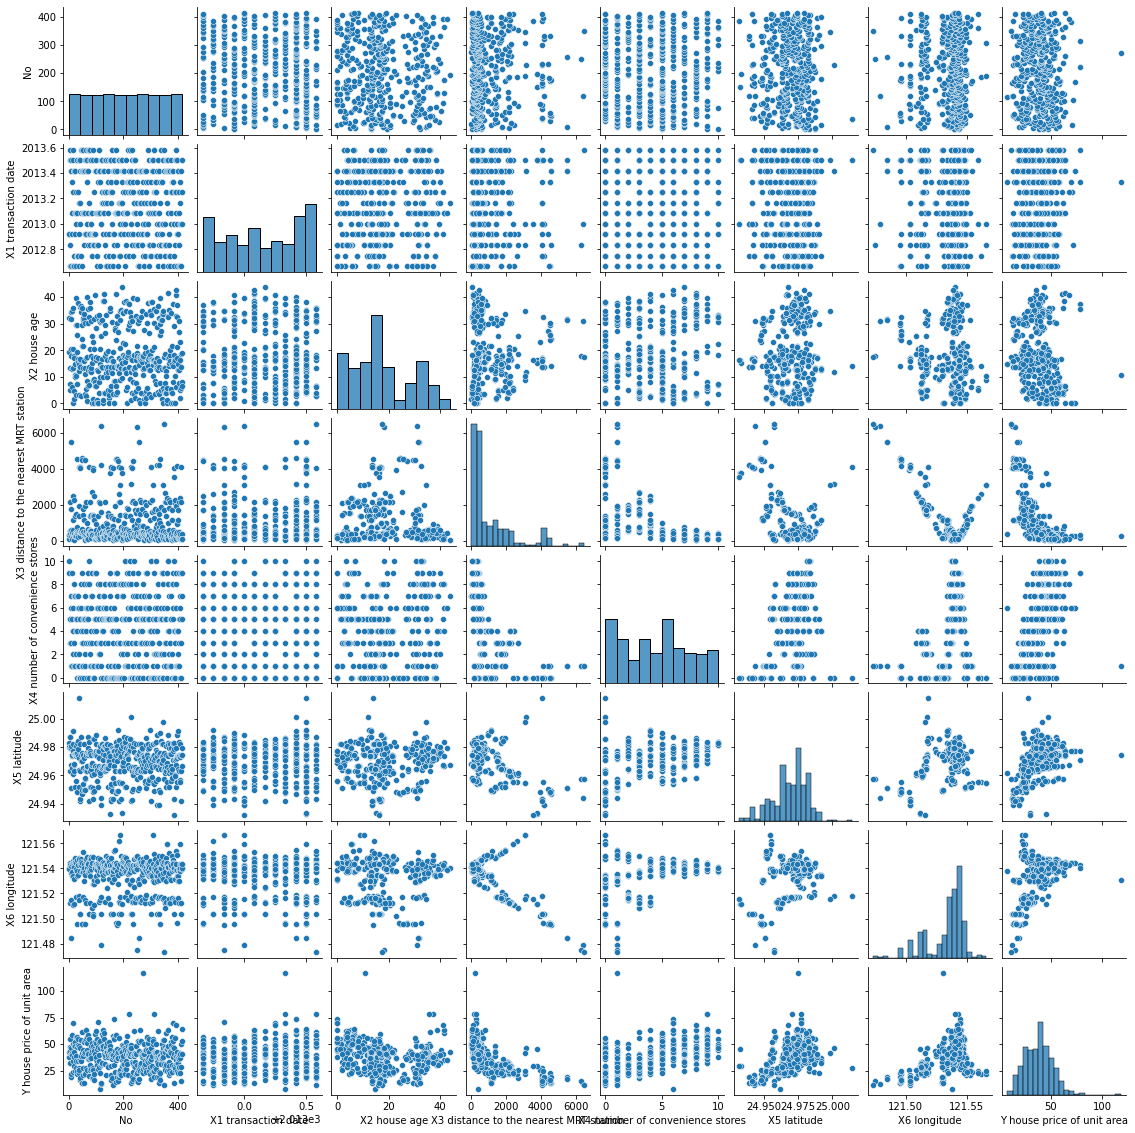

In [7]:
sns.pairplot(reg,height=2)                 #pairplot and heatmap to see the correlation

<AxesSubplot:>

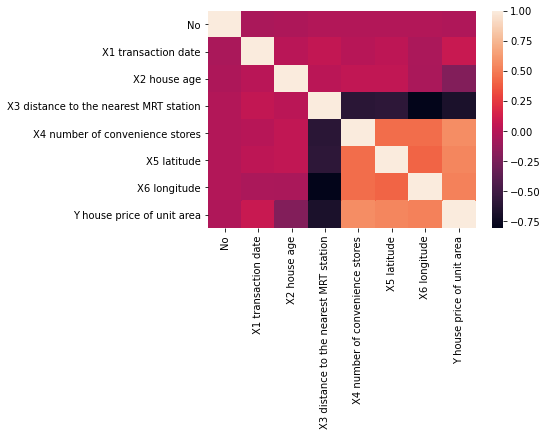

In [8]:
sns.heatmap(reg.corr())

In [9]:
from sklearn.preprocessing import StandardScaler              #importing standard scaler to Standardize the data
r = StandardScaler().fit(reg)   
reg1 = r.transform(reg)

In [10]:
reg = pd.DataFrame(reg1)
reg.head()

,0,1,2,3,4,5,6,7
0,-1.727872,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-1.719505,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-1.711137,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-1.702770,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.694402,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


In [11]:
X = reg.iloc[: , :-1].values                   #defining X and y for regression
y = reg.iloc[:, 7]

In [12]:
print(y)

0     -0.005901
1      0.310507
2      0.685782
3      1.237656
4      0.376732
         ...   
409   -1.661525
410    0.884457
411    0.192774
412    1.068415
413    1.907264
Name: 7, Length: 414, dtype: float64


In [13]:
print(X)

[[-1.72787215 -0.82368321  1.25562833 ...  2.00740743  1.12542986
   0.44876222]
 [-1.71950473 -0.82368321  0.15708622 ...  1.66750286  0.91244418
   0.40113894]
 [-1.71113731  1.54115111 -0.38779067 ...  0.30788458  1.48686011
   0.68818339]
 ...
 [ 1.71113731  0.35873395  0.09556786 ...  0.98769372  0.82289338
   0.42397202]
 [ 1.71950473 -0.52896662 -0.84478419 ...  0.30788458 -0.18475479
   0.4768143 ]
 [ 1.72787215  1.24643452 -0.98539758 ...  1.66750286  0.42757905
   0.63534112]]


In [30]:
from sklearn.model_selection import train_test_split         #importing train_test_split for splitting the data in train and 
                                                              #test model
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.20,random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression        #fitting the regression model
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [32]:
y_pred_test = model.predict(X_test)            #predicting the test model
y_pred_test

array([-3.02799066e-01,  7.25703367e-01, -1.15133796e+00, -1.83468542e+00,
        3.76338920e-01, -3.32600390e-01, -5.59528611e-01,  4.78695189e-01,
       -3.74586260e-03, -1.76408879e+00, -1.91453506e+00,  2.45735125e-02,
       -4.83322287e-01,  5.13370930e-01,  9.43104020e-01, -1.79840364e-01,
        4.37777876e-01,  5.32181655e-01, -5.69547705e-01,  3.87540381e-01,
        9.32783408e-01, -6.89897919e-01,  9.63273906e-02,  6.38592387e-01,
        6.14200075e-01, -7.28931326e-01, -4.46009915e-01,  7.07025037e-01,
        6.56008104e-01, -1.69573114e+00, -3.04716425e-01, -2.95256072e-01,
        2.78136066e-01,  4.36903425e-01,  7.56807401e-01, -1.79356807e+00,
        2.06578904e-01,  2.02308274e-01,  4.05387171e-02, -1.78538974e+00,
        9.99742923e-02, -1.02548887e+00,  1.20820557e+00, -1.24512630e-01,
       -2.93448211e-01,  4.29085345e-02, -5.81547632e-01,  5.29823734e-02,
        5.08440099e-01, -3.75631007e-01, -1.93868668e+00,  4.45846711e-01,
        4.52463568e-01, -

In [33]:
print('Intercept:',model.intercept_)            #intercepts and coefficients for test model

Intercept: -9.278107276685423e-14


In [34]:
print("Coefficients:",model.coef_)

Coefficients: [-0.03160133  0.10525392 -0.22677144 -0.41933912  0.24446843  0.20491951
 -0.01626879]


In [35]:
y_test_train = model.predict(X_train)            #predicting the train model

In [36]:
y_test_train

array([ 0.43407413,  1.12440876,  0.6211773 ,  0.09025652, -1.52146831,
       -0.25270336,  0.43362769, -2.05577706, -0.3120655 ,  0.71913339,
        0.46253597,  1.01246627, -0.9496849 , -0.80370327, -1.66216363,
        0.17310719, -0.18151756,  0.15304642,  0.14901182, -1.82028024,
       -0.15653139,  0.41964932, -0.48571905, -1.79716094, -0.39327271,
       -0.01996239, -0.31582101,  0.05565097, -0.31712185, -0.06149754,
       -0.07007713,  0.64325163,  0.65116545,  0.02983044,  0.20467096,
        0.72189843,  0.81531336,  1.19549341, -2.05509449,  0.05513906,
       -1.77203984,  0.43944497,  0.06473932,  0.18209523, -0.41925311,
        0.13079616,  0.23087692,  0.55608973,  0.77869282,  0.58354932,
       -0.62374931, -0.05385145, -0.21081173,  0.7034434 ,  0.1575991 ,
       -0.46130035, -0.88948124,  0.66138355,  0.63134902,  0.41886709,
        0.32111104, -0.81353271,  0.92070054,  1.04913338,  0.6765591 ,
       -0.07055059,  0.57718618,  1.14369755,  0.45474874,  0.00

In [37]:
print("Intercepts:",model.intercept_)           #intercepts and coefficients for train model
print("Coefficeints:",model.coef_)      

Intercepts: -9.278107276685423e-14
Coefficeints: [-0.03160133  0.10525392 -0.22677144 -0.41933912  0.24446843  0.20491951
 -0.01626879]


In [38]:
from sklearn import metrics                                #importing metrics to calculate Mean Absolute Error and Mean Squared 
                                                                                                                   #Error
MAE_train = metrics.mean_absolute_error(y_train,y_test_train)
MAE_test = metrics.mean_absolute_error(y_test,y_pred_test)

In [39]:
print("MAE for train data is  :{}".format(MAE_train))
print("MAE for test data is :{}".format(MAE_test))

MAE for train data is  :0.4035303283661268
MAE for test data is :0.4597068764619398


In [40]:
MSE_train = metrics.mean_squared_error(y_train,y_test_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
print("MSE for train data is  :{}".format(MSE_train))
print("MSE for test data is :{}".format(MSE_test))

MSE for train data is  :0.27672119117216404
MSE for test data is :0.4511941927953015


In [41]:
RMSE_train =np.sqrt(metrics.mean_squared_error(y_train,y_test_train))         #calculating RMSE using numpy
RMSE_test =np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
print("RMSE for train data is  :{}".format(RMSE_train))
print("RMSE for test data is :{}".format(RMSE_test))

RMSE for train data is  :0.526042955634009
RMSE for test data is :0.6717099022608655


In [42]:
yhat = model.predict(X_train)                         #calculating R-square and Adjusted R Square
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
R_Square =1-(float(SS_Residual))/SS_Total
Adj_R_Square = 1-(1-R_Square)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

In [43]:
print(R_Square,Adj_R_Square)

0.6415089537202512 0.6075976385316263


In [44]:
yhat = model.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
R_Square =1-(float(SS_Residual))/SS_Total
Adj_R_Square = 1-(1-R_Square)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

In [45]:
print(R_Square,Adj_R_Square)

0.5721622486210187 0.5316911099770609
